**Research question:**

1.Which country-born artists are the main component of the data available for artists. 
2.What is the approximate size of the artwork

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, I separated the cities and countries in the data, because if I didn't, the final bar chart would have mixed the cities and countries together, so I separated the countries with commas and recreated a new column in the dataframe.Then I remove the missing values and pre-process the data.

In [121]:
pd.options.display.max_rows =(999)
data = pd.read_csv("artist_data.csv")

In [151]:
data_1=pd.concat([data, data['placeOfBirth'].str.split(',', expand=True)], axis=1)

In [152]:
data_1.rename(columns={0:'CityOfBirth',1:'CountryOfBirth'},inplace=True)
data_1 = data_1.drop(columns=[2])
data_clean = data_1.dropna(axis=0, how='any', inplace=False) 

In [153]:
data_clean

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,CityOfBirth,CountryOfBirth
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,Philadelphia,United States
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...,Springfield,United States
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...,Leicestershire,United Kingdom
5,2606,Absalon,Male,1964–1993,1964.0,1993.0,"Tel Aviv-Yafo, Yisra'el","Paris, France",http://www.tate.org.uk/art/artists/absalon-2606,Tel Aviv-Yafo,Yisra'el
10,2411,"Adam, Robert",Male,1728–1792,1728.0,1792.0,"Kirkcaldy, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-adam...,Kirkcaldy,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
3511,2181,"Yuon, Konstantin",Male,1875–1958,1875.0,1958.0,"Moskva, Rossiya","Moskva, Rossiya",http://www.tate.org.uk/art/artists/konstantin-...,Moskva,Rossiya
3512,2182,"Yvaral, Jean-Pierre",Male,1934–2002,1934.0,2002.0,"Paris, France","Paris, France",http://www.tate.org.uk/art/artists/jean-pierre...,Paris,France
3517,2184,"Zadkine, Ossip",Male,1890–1967,1890.0,1967.0,"Smolensk, Rossiya","Paris, France",http://www.tate.org.uk/art/artists/ossip-zadki...,Smolensk,Rossiya
3519,2185,"Zao, Wou-ki",Male,1921 – 2013,1921.0,2013.0,"Beijing, Zhonghua","Nyon, Schweiz",http://www.tate.org.uk/art/artists/zao-wou-ki-...,Beijing,Zhonghua


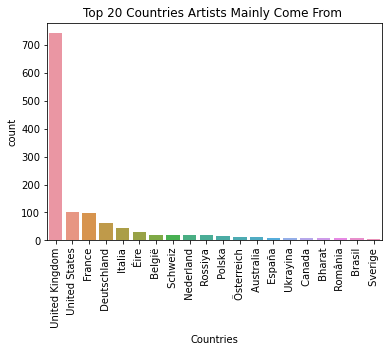

In [175]:
labels = data_clean['CountryOfBirth'].str.split(',', expand=True)
labels

sns.countplot(data=labels, x=0,order=labels[0].value_counts().iloc[:20].index) 
plt.xticks(rotation=90)
plt.title('Top 20 Countries Artists Mainly Come From ')
plt.xlabel('Countries')
plt.show()

In the available data graphs, it can be seen that the number of artists born in the UK is much higher than in other countries, the US and France have similar numbers but also much lower than the number of artists in the UK. So it can be seen that the main countries of origin of the writers in the data are mainly Western countries, English-speaking countries, with only a small percentage of artists born in South America and other regions.


In [162]:
data_2 = pd.read_csv("artwork_data.csv")
data_2 = data_2.dropna(axis=0, how='any', inplace=False) 

/var/folders/zt/661jnz253rs8bbqxh65g2k7r0000gn/T/ipykernel_52892/3800602961.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2 = pd.read_csv("artwork_data.csv")


In [163]:
data_2

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
1738,98171,AR00001,"Katz, Alex",artist,1386,Pansies,1967,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1967.0,2008.0,support: 309 x 404 x 4 mm frame: 322 x 424 x 3...,309,404.0,4.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-pansi...
1739,98172,AR00002,"Katz, Alex",artist,1386,Tulips,1969,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1969.0,2008.0,support: 356 x 253 x 3 mm frame: 375 x 273 x 3...,356,253.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-tulip...
1740,98173,AR00003,"Katz, Alex",artist,1386,West Window,1979,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1979.0,2008.0,support: 196 x 238 x 3 mm frame: 216 x 256 x 3...,196,238.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-west-...
1741,98174,AR00004,"Katz, Alex",artist,1386,Lillies Against Yellow House,1983,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1983.0,2008.0,support: 307 x 229 x 3 mm frame: 327 x 249 x 3...,307,229.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-lilli...
1742,98175,AR00005,"Katz, Alex",artist,1386,Young Trees,1989,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1989.0,2008.0,support: 407 x 301 x 3 mm frame: 426 x 320 x 3...,407,301.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-young...
1743,98177,AR00006,"Katz, Alex",artist,1386,Daisies #2,1992,Oil paint on board,ARTIST ROOMS Acquired jointly with the Nationa...,1992.0,2008.0,support: 231 x 320 x 6 mm frame: 250 x 321 x 3...,231,320.0,6.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-daisi...
1744,98178,AR00007,"Katz, Alex",artist,1386,Ocean View,1992,Oil paint on fibreboard,ARTIST ROOMS Acquired jointly with the Nationa...,1992.0,2008.0,support: 231 x 320 x 6 mm frame: 251 x 315 x 3...,231,320.0,6.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-ocean...
1747,98183,AR00010,"Katz, Alex",artist,1386,West Palm Beach,1997,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1997.0,2008.0,support: 228 x 299 x 3 mm frame: 249 x 319 x 3...,228,299.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-west-...
1749,98185,AR00012,"Katz, Alex",artist,1386,City Night,1998,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1998.0,2008.0,support: 229 x 300 x 4 mm frame: 249 x 321 x 3...,229,300.0,4.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-city-...
1751,98187,AR00014,"Katz, Alex",artist,1386,Road,1998,Oil paint on hardboard,ARTIST ROOMS Acquired jointly with the Nationa...,1998.0,2008.0,support: 308 x 230 x 3 mm frame: 323 x 250 x 3...,308,230.0,3.0,mm,date inscribed,© Alex Katz,http://www.tate.org.uk/art/images/work/AR/AR00...,http://www.tate.org.uk/art/artworks/katz-road-...


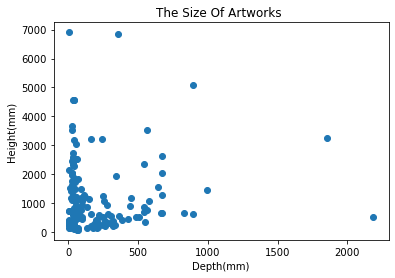

In [172]:
x = pd.Series(data_2.depth)
y = pd.Series(data_2.height)
plt.scatter(x,y)
plt.xlabel("Depth(mm)")
plt.ylabel("Height(mm)")
plt.title('The Size Of Artworks ')
plt.show()

From the pictures, the artworks are mainly small in volume, with an overall inverse proportion between height and depth, and there are generally no cases where height and depth have large values at the same time.